# **ASL (American Sign Language) Alphabet Classification Using Convolutional Neural Network**

## **Task 1: Data analysis**

Exploring the dataset


In [2]:
import os
from skimage import io

# Specify the path to your dataset
dataset_path = 'C:\\Users\\nadav\\Downloads\\Final_Data_Full\\Final_Data_Full\\train'
test_data_path = 'archive/test'
train_path = 'C:\\Users\\nadav\\Downloads\\Final_Data_Full\\Final_Data_Full\\train'

# Function to check the shape of images in the dataset and count unique classes
def check_image_shapes_and_classes(dataset_path):
    unique_shapes = set()  # Use a set to store unique shapes for the entire dataset
    unique_classes = set()  # Use a set to store unique classes in the dataset

    classes = os.listdir(dataset_path)

    for class_name in classes:
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):
            unique_classes.add(class_name)  # Add the class to the set of unique classes

            images = os.listdir(class_folder)

            for img_name in images:
                img_path = os.path.join(class_folder, img_name)

                # Check if the current item is a file before attempting to read it
                if os.path.isfile(img_path):
                    sample_image = io.imread(img_path)
                    image_shape = sample_image.shape

                    # Add the shape to the set
                    unique_shapes.add(image_shape)

    # Print the set of unique shapes for the entire dataset
    print("Unique Shapes for the Entire Dataset:", unique_shapes)

    # Print the set of unique classes in the dataset
    print("Unique Classes in the Dataset:", sorted(unique_classes))
    print("Number of Unique Classes in the Dataset:", len(unique_classes))

# Check the shape of images and count unique classes in the dataset
check_image_shapes_and_classes(dataset_path)

Unique Shapes for the Entire Dataset: {(400, 400, 3), (200, 200, 3), (480, 640, 3), (1920, 1920, 3), (720, 1280, 3)}
Unique Classes in the Dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Number of Unique Classes in the Dataset: 29


Data info:
Number of Channels: 3<br>
Number of Unique Classes: 29<br>
Images Shape: multiple

A Visual and Tabular Examination of Class Distribution

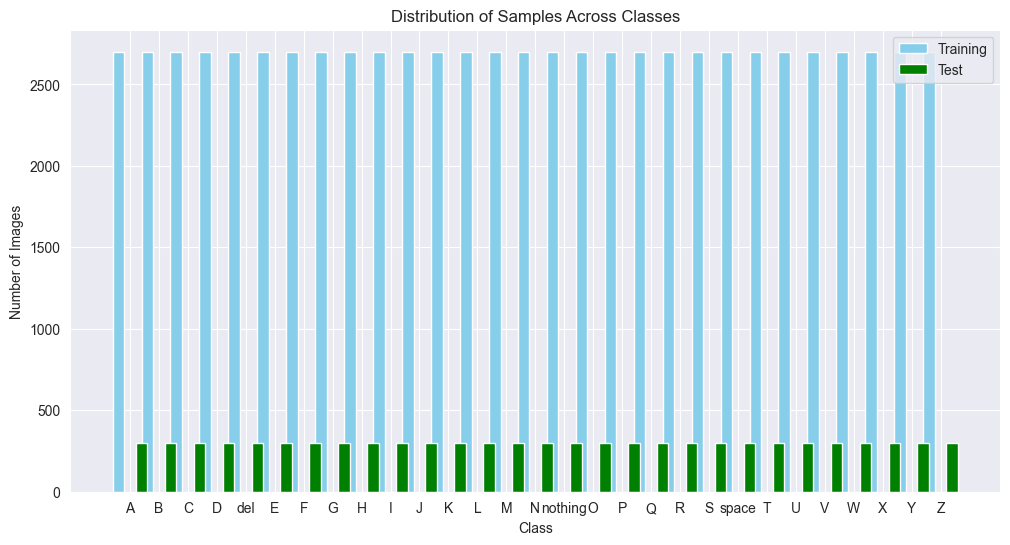

In [3]:
def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            num_images = len(os.listdir(class_folder))
            class_counts[class_name] = num_images
    return class_counts

train_counts = count_images_per_class(train_path)
test_counts = count_images_per_class(test_data_path)

class_labels = list(train_counts.keys())

train_values = [train_counts.get(label, 0) for label in class_labels]
test_values = [test_counts.get(label, 0) for label in class_labels]

bar_width = 0.4
index = np.arange(len(class_labels))

plt.figure(figsize=(12, 6))
plt.bar(index, train_values, width=bar_width, label='Training', color='skyblue')
# plt.bar(index + bar_width, validation_values, width=bar_width, label='Validation', color='orange')
plt.bar(index + 2 * bar_width, test_values, width=bar_width, label='Test', color='green')

plt.title('Distribution of Samples Across Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(index + bar_width, class_labels)
plt.legend()
plt.show()

Benchmarks

The first benchmark model, trained for 5 epochs, achieved a validation accuracy of approximately 89.5%. The training process used a deep neural network,
and the code was executed on Kaggle Kernels with a GPU.
<br>
https://www.kaggle.com/code/dansbecker/running-kaggle-kernels-with-a-gpu

<br>

The second benchmark model, trained for 10 epochs,
achieved a higher validation accuracy of around 91.2%. This model also utilized a convolutional neural network (CNN) implemented with the Keras framework.
<br>
 https://www.kaggle.com/code/paultimothymooney/interpret-sign-language-with-deep-learning

Sample Images

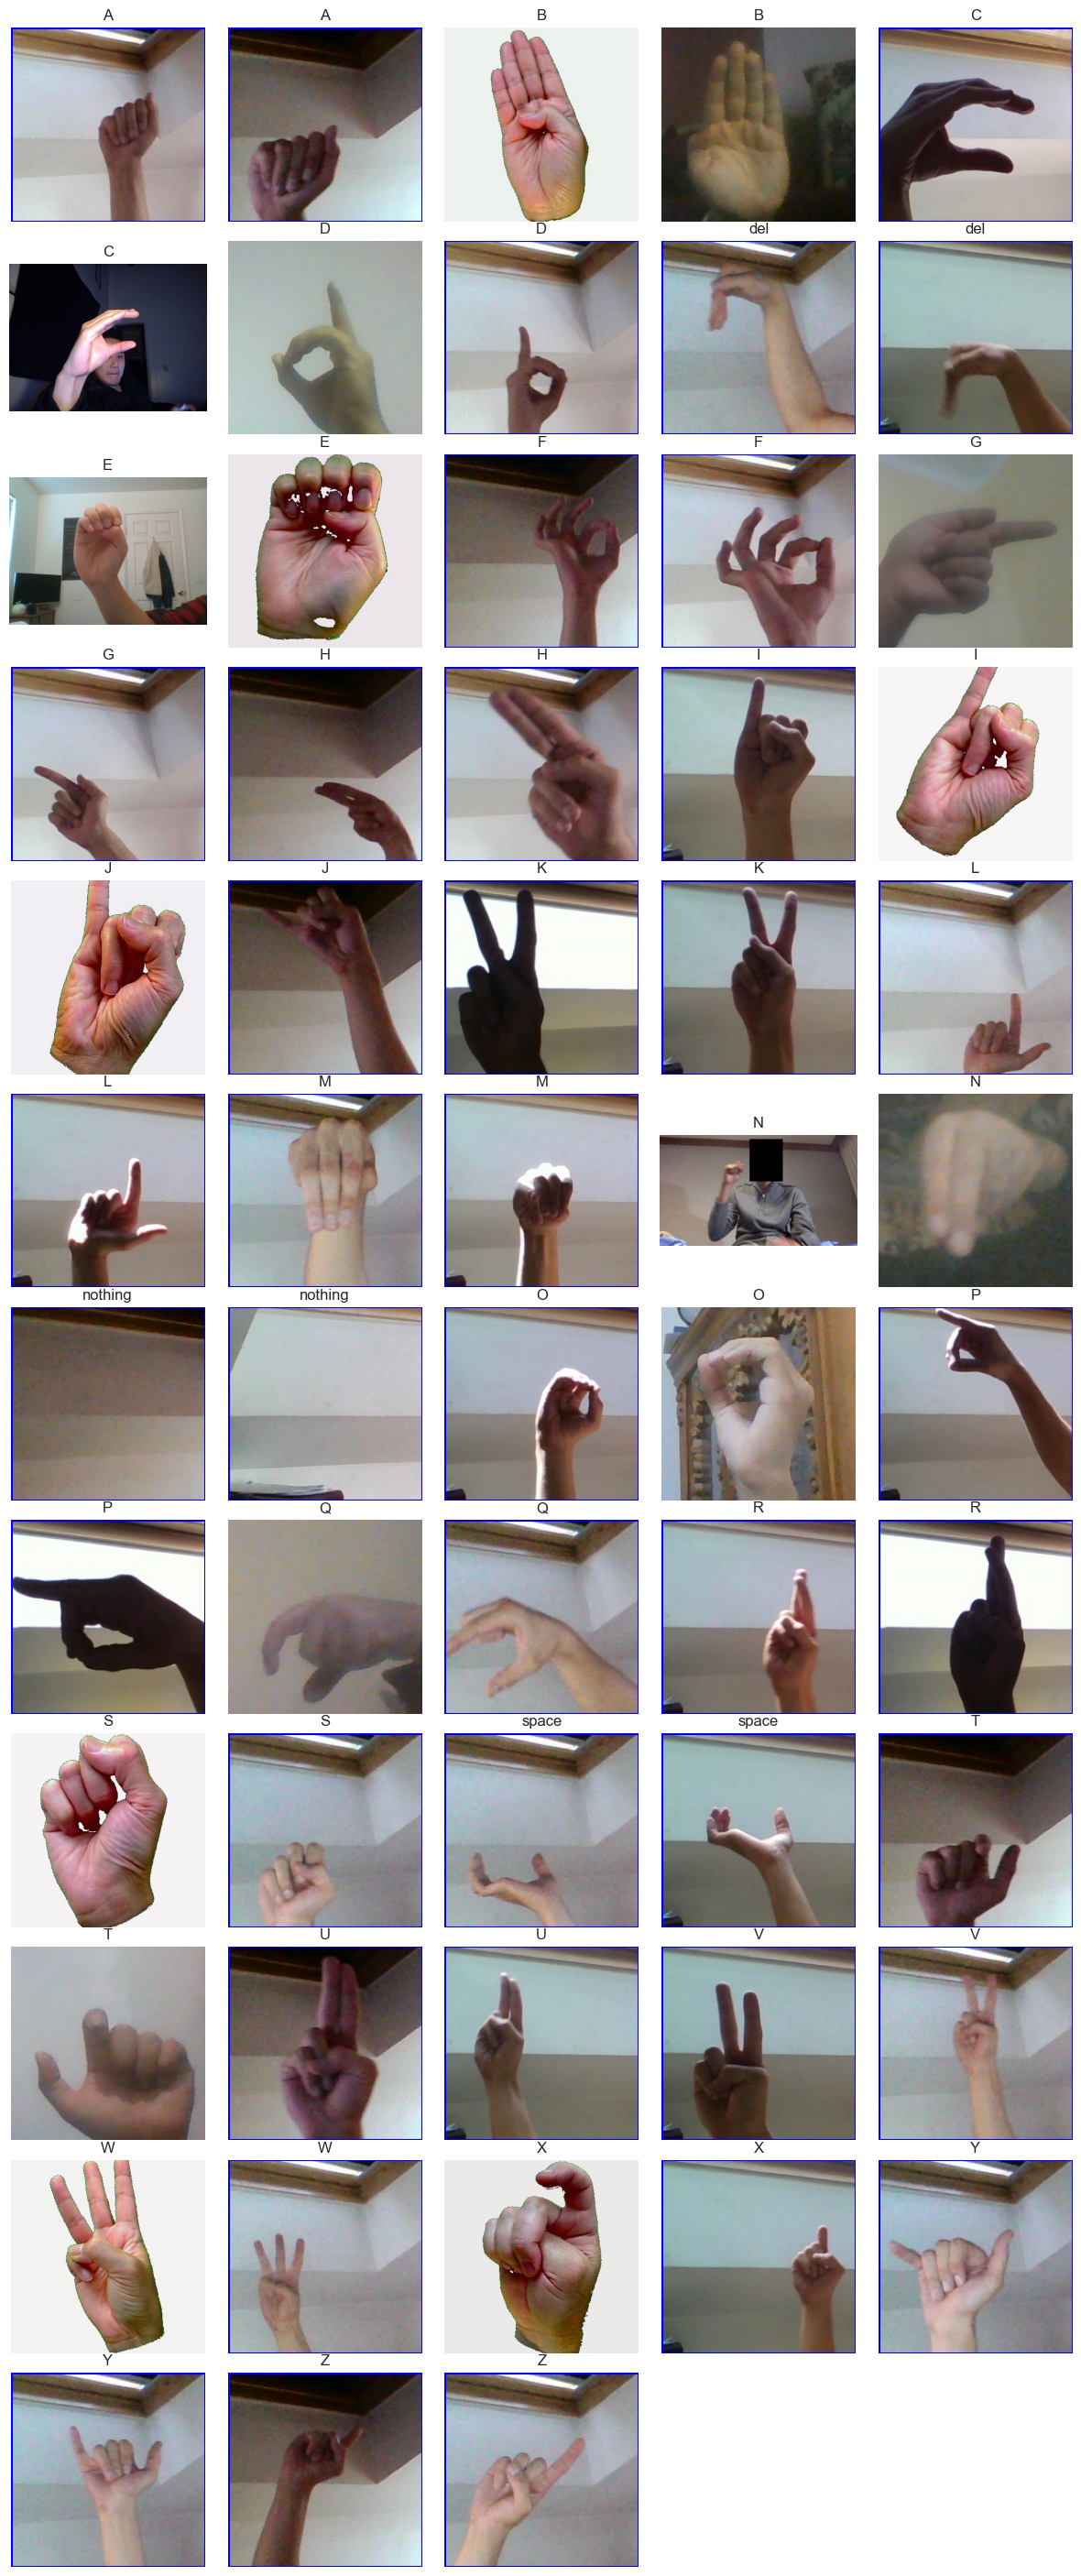

In [4]:
# Specify the path to your training data folder
# train_path = 'archive/asl_alphabet_train/asl_alphabet_train'

# Function to randomly select a sample image from each class
def get_sample_images(folder_path, num_samples_per_class=2):
    sample_images = []
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            images = os.listdir(class_folder)
            selected_images = random.sample(images, min(num_samples_per_class, len(images)))
            for img_name in selected_images:
                img_path = os.path.join(class_folder, img_name)
                sample_images.append((class_name, cv2.imread(img_path)))
    return sample_images

# Get sample images from each class
sample_images = get_sample_images(train_path)

# Calculate grid size dynamically
num_samples = len(sample_images)
num_cols = min(5, num_samples)
num_rows = -(-num_samples // num_cols)  # Ceiling division

# Plotting the sample images
plt.figure(figsize=(15, 3 * num_rows))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.1, hspace=0.1)

for i, (class_name, img) in enumerate(sample_images):
    ax = plt.subplot(gs[i])
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(class_name)
    ax.axis('off')

plt.show()

In [17]:
# Function to save model parameters
def save_model(model, epoch, step, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = f"epoch={epoch}-step={step}.ckpt"
    filepath = os.path.join(directory, filename)
    torch.save(model.state_dict(), filepath)
    return filepath

In [26]:
batch_size = 64

# Define the transformations for our data
data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_data_path = 'archive/test'
# train_path = 'C:\\Users\\nadav\\PycharmProjects\\assignment1\\pythonProject7\\archive\\asl_alphabet_subset'
train_path = 'C:\\Users\\nadav\\Downloads\\Final_Data_Full\\Final_Data_Full\\train'

train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_data_path, transform=data_transform)

run = neptune.init_run(
    project="nadavcherry/dp1",
    api_token="a", # your credentials
)

dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size
train_data, train_val = random_split(train_dataset, [train_size, val_size])
train_loader  = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_val, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

https://app.neptune.ai/nadavcherry/dp1/e/DP-256
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [27]:
def freeze_layers(model):
    for param in model.parameters():
        param.requires_grad = False

In [28]:
# Replace the last layer function
def replace_last_layer(model, num_classes=29):
    # Check if the model has a classifier
    if hasattr(model, 'classifier'):
      if isinstance(model.classifier, nn.Sequential):
        in_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Linear(in_features, num_classes)
      else:
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, num_classes)

    # Check if the model has an fc layer
    elif hasattr(model, 'fc'):
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, num_classes)

    else:
        raise ValueError("Unsupported model architecture")

    return model

In [29]:
# Function to calculate validation metrics
def calculate_validation_metrics(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_accuracy = val_correct / val_total if val_total != 0 else 0

    return val_loss / len(val_loader), val_accuracy

In [30]:
def plot_metrics(model):
    # Assuming you have lists for validation and test losses and accuracies
    epochs = range(1, len(model.train_loss1_arr) + 1)

    # Create two subplots (one for loss and one for accuracy)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    # Plot the training and validation losses
    ax1.plot(epochs, model.train_loss1_arr, label='Training Loss', marker='o', linestyle='-')
    ax1.plot(epochs, model.val_loss1_arr, label='Validation Loss', marker='o', linestyle='-')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss vs. Epoch')
    ax1.legend()

    # Plot the training and validation accuracies
    ax2.plot(epochs, model.train_accuracy1_arr, label='Training Accuracy', marker='s', linestyle='--', color='red')
    ax2.plot(epochs, model.val_accuracy1_arr, label='Validation Accuracy', marker='s', linestyle='--', color='orange')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy vs. Epoch')
    ax2.legend()


            # Save the confusion matrix plot
    # Save the plots
    plot_path = 'metrics_plot.png'
    plt.savefig(plot_path)
    plt.close()
    run["EX.1/metrics_plot"].upload(plot_path)

    plt.show()

In [31]:
def print_errors_images(model, loader, device):
    model.eval()
    error_images = []
    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            incorrect_indices = (predicted != labels).nonzero()
            for index in incorrect_indices:
                error_images.append(images[index].cpu().numpy())
                true_labels.append(labels[index].item())
                predicted_labels.append(predicted[index].item())

    return error_images, true_labels, predicted_labels

In [32]:
# Function to fine-tune the model
def fine_tune_model(model, train_loader, val_loader, test_loader, num_epochs=10, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Create a table
    table = PrettyTable()
    table.field_names = ["Epoch", "Validation Loss", "Validation Accuracy", "Test Loss", "Test Accuracy", "# Unique Correct Samples", "# Unique Errors"]

    # Lists to store training and validation metrics
    model.train_loss1_arr = []
    model.val_loss1_arr = []
    model.train_accuracy1_arr = []
    model.val_accuracy1_arr = []

    for epoch in range(num_epochs):
        model.train()
        total_correct = 0
        total_samples = 0
        train_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

        train_accuracy = total_correct / total_samples if total_samples != 0 else 0

        # Evaluate the model on the validation set
        model.eval()
        # Calculate validation loss and accuracy
        val_loss, val_accuracy = calculate_validation_metrics(model, val_loader, criterion, device)

        # Print error images for validation set
        error_images_val, true_labels_val, predicted_labels_val = print_errors_images(model, val_loader, device)

        # Append values to lists
        model.train_loss1_arr.append(train_loss / len(train_loader))
        model.val_loss1_arr.append(val_loss / len(val_loader))
        model.train_accuracy1_arr.append(train_accuracy)
        model.val_accuracy1_arr.append(val_accuracy)

        val_correct = 0
        val_total = 0
        unique_correct_samples_val = set()
        unique_errors_val = set()
        val_loss = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                unique_correct_samples_val.update(labels[predicted == labels].cpu().numpy())
                unique_errors_val.update(labels[predicted != labels].cpu().numpy())

        val_accuracy = val_correct / val_total if val_total != 0 else 0

        # Evaluate the model on the test set
        model.eval()
        test_correct = 0
        test_total = 0
        unique_correct_samples_test = set()
        unique_errors_test = set()
        test_loss = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()

                unique_correct_samples_test.update(labels[predicted == labels].cpu().numpy())
                unique_errors_test.update(labels[predicted != labels].cpu().numpy())

        test_accuracy = test_correct / test_total if test_total != 0 else 0

        # Print the names of unique errors (images)
        # print("Unique Errors:")
        # for error in unique_errors_test:
        #     print(error)

        # Append information to the table
        table.add_row([epoch + 1, val_loss / len(val_loader), val_accuracy, test_loss / len(test_loader), test_accuracy, len(unique_correct_samples_test), len(unique_errors_test)])

        print("Done", epoch + 1, "/", num_epochs, "epochs")

    # Plot the training and validation metrics
    plot_metrics(model)

    # Save and upload table to Neptune
    table_txt = str(table)
    table_path = 'table.txt'
    with open(table_path, 'w') as f:
        f.write(table_txt)
    if run is not None:
        run["EX.1/Table"].upload(table_path)

    model_path = save_model(model, num_epochs, len(train_loader) * num_epochs, 'model_checkpoints')
    if run is not None:
        run["EX.1/Model"].upload(model_path)
    print(table)

### EX.1 - ResNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**Without using freezing**

In [ ]:


# 1. Load a pre-trained ResNet18 model
resnet_model_1 = models.resnet18(pretrained=True)

# 2. Replace the last layer for the new task
resnet_model_1 = replace_last_layer(resnet_model_1)

# 3. Fine-tune the model on your dataset
fine_tune_model(resnet_model_1, train_loader, val_loader, test_loader)

### EX.2 - ResNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.0001 <br>
**Without using freezing**

In [33]:
# 1. Load a pre-trained ResNet18 model
resnet_model_2 = models.resnet18(pretrained=True)

# 2. Replace the last layer for the new task
resnet_model_2 = replace_last_layer(resnet_model_2, 29)

# 3. Fine-tune the model on your dataset
fine_tune_model(resnet_model_2, train_loader, val_loader, test_loader, num_epochs=10, learning_rate=0.0001)

Done 1 / 10 epochs
Done 2 / 10 epochs
Done 3 / 10 epochs
Done 4 / 10 epochs
Done 5 / 10 epochs
Done 6 / 10 epochs
Done 7 / 10 epochs
Done 8 / 10 epochs
Done 9 / 10 epochs
Done 10 / 10 epochs
+-------+----------------------+---------------------+----------------------+--------------------+--------------------------+-----------------+
| Epoch |   Validation Loss    | Validation Accuracy |      Test Loss       |   Test Accuracy    | # Unique Correct Samples | # Unique Errors |
+-------+----------------------+---------------------+----------------------+--------------------+--------------------------+-----------------+
|   1   | 0.02081327505257665  |  0.9957215836526181 | 0.022079511899980444 | 0.9957471264367816 |            29            |        13       |
|   2   | 0.016649082992986147 |  0.9968071519795658 | 0.01774675462323049  | 0.9957471264367816 |            29            |        17       |
|   3   | 0.022364944663868114 |  0.9943167305236271 | 0.020453445843646906 | 0.995057471

### EX.3 - ResNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.0001 <br>
**Using freezing**

In [ ]:
# 1. Load a pre-trained ResNet18 model
resnet_model_3 = models.resnet18(pretrained=True)

# 2. Freeze layers
freeze_layers(resnet_model_3)

# 3. Replace the last layer for the new task
resnet_model_3 = replace_last_layer(resnet_model_3)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in resnet_model_3.fc.parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(resnet_model_3, train_loader, val_loader, test_loader, num_epochs=10, learning_rate=0.0001)

### EX.4 - ResNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**Using freezing**

In [ ]:
# 1. Load a pre-trained ResNet18 model
resnet_model_4 = models.resnet18(pretrained=True)

# 2. Freeze layers
freeze_layers(resnet_model_4)

# 3. Replace the last layer for the new task
resnet_model_4 = replace_last_layer(resnet_model_4)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in resnet_model_4.fc.parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(resnet_model_4, train_loader, val_loader, test_loader)

### EX.5 - ResNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.0005 <br>
**Using freezing**

In [ ]:
# 1. Load a pre-trained ResNet18 model
resnet_model_5 = models.resnet18(pretrained=True)

# 2. Freeze layers
freeze_layers(resnet_model_5)

# 3. Replace the last layer for the new task
resnet_model_5 = replace_last_layer(resnet_model_5)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in resnet_model_5.fc.parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(resnet_model_5, train_loader, val_loader, test_loader, num_epochs=10, learning_rate=0.0005)

### EX.6 - ResNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**With Calculate the mean and std for the normalization** <br>
**Using freezing**

In [ ]:
# Calculate the mean and std
# --------------------------

# Assuming 'train_loader' is your data loader
mean = 0.0
std = 0.0
total_images = 0

for images, _ in train_loader:
    batch_size = images.size(0)
    images = images.view(batch_size, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_size

mean /= total_images
std /= total_images

# Convert mean and std to arrays
mean_array = mean.numpy()
std_array = std.numpy()

print("Calculated Mean:", mean)
print("Calculated Std Dev:", std)

In [ ]:
# Define the transformations for our data
data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_data_path = 'archive/test'
# train_path = 'C:\\Users\\nadav\\PycharmProjects\\assignment1\\pythonProject7\\archive\\asl_alphabet_subset'
train_path = 'C:\\Users\\nadav\\Downloads\\Final_Data_Full\\Final_Data_Full\\train'

train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_data_path, transform=data_transform)

dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size
train_data, train_val = random_split(train_dataset, [train_size, val_size])
train_loader  = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_val, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
# 1. Load a pre-trained ResNet18 model
resnet_model_6 = models.resnet18(pretrained=True)

# 2. Freeze layers
freeze_layers(resnet_model_6)

# 3. Replace the last layer for the new task
resnet_model_6 = replace_last_layer(resnet_model_6)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in resnet_model_6.fc.parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(resnet_model_6, train_loader, val_loader, test_loader)

### EX.7 - AlexNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**Using freezing**

In [ ]:
batch_size = 128

# Define the transformations for our data
data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_data_path = 'archive/test'
# train_path = 'C:\\Users\\nadav\\PycharmProjects\\assignment1\\pythonProject7\\archive\\asl_alphabet_subset'
train_path = 'C:\\Users\\nadav\\Downloads\\Final_Data_Full\\Final_Data_Full\\train'

train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_data_path, transform=data_transform)

dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size
train_data, train_val = random_split(train_dataset, [train_size, val_size])
train_loader  = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_val, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
# 1. Load a pre-trained AlexNet model
alexnet_model_1 = models.alexnet(pretrained=True)

# 2. Freeze layers
freeze_layers(alexnet_model_1)

# 3. Replace the last layer for the new task
alexnet_model_1 = replace_last_layer(alexnet_model_1)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in alexnet_model_1.classifier[6].parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(alexnet_model_1, train_loader, val_loader, test_loader)

### EX.8 - DenseNet

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**Using freezing**

In [ ]:
# 1. Load a pre-trained DenseNet model
densenet_model_1 = models.densenet121(pretrained=True)

# 2. Freeze layers
freeze_layers(densenet_model_1)

# 3. Replace the last layer for the new task
densenet_model_1 = replace_last_layer(densenet_model_1)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in densenet_model_1.classifier.parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(densenet_model_1, train_loader, val_loader, test_loader, ex=8)

### EX.9 - VGG16

batch_size = 64 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**Using freezing**

In [ ]:
# 1. Load a pre-trained DenseNet model
vgg_model_1 = models.vgg16(pretrained=True)

# 2. Freeze layers
freeze_layers(vgg_model_1)

# 3. Replace the last layer for the new task
vgg_model_1 = replace_last_layer(vgg_model_1)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in vgg_model_1.classifier.parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(vgg_model_1, train_loader, val_loader, test_loader, ex=9)

### EX.10 - AlexNet

batch_size = 128 <br>
num_epochs=10 <br>
learning_rate=0.001 <br>
**Using freezing**

In [ ]:
# Define the transformations for our data
data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_data_path = 'archive/test'
# train_path = 'C:\\Users\\nadav\\PycharmProjects\\assignment1\\pythonProject7\\archive\\asl_alphabet_subset'
train_path = 'C:\\Users\\nadav\\Downloads\\Final_Data_Full\\Final_Data_Full\\train'

train_dataset = datasets.ImageFolder(train_path, transform=data_transform)
test_dataset = datasets.ImageFolder(test_data_path, transform=data_transform)

dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size
train_data, train_val = random_split(train_dataset, [train_size, val_size])
train_loader  = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_val, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)

In [ ]:
# 1. Load a pre-trained AlexNet model
alexnet_model_2 = models.alexnet(pretrained=True)

# 2. Freeze layers
freeze_layers(alexnet_model_2)

# 3. Replace the last layer for the new task
alexnet_model_2 = replace_last_layer(alexnet_model_2)

# Set the requires_grad attribute for the parameters of the last layer to True
for param in alexnet_model_2.classifier[6].parameters():
    param.requires_grad = True

# 4. Fine-tune the model on your dataset
fine_tune_model(alexnet_model_2, train_loader, val_loader, test_loader)

# tast 3.d


In [ ]:
resnet_model_2

In [34]:
resnet_model = resnet_model_2

In [35]:
# Remove the last fully connected layer (classification layer)
def remove_last_layer(model):
    # Replace the last fully connected layer with an identity layer
    if isinstance(model, models.ResNet):
        model.fc = nn.Identity()
    else:
        raise ValueError("Unsupported model architecture")
    return model

resnet_model = remove_last_layer(resnet_model)

# Print the modified model to verify the changes
print(resnet_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [37]:
def extract_features(model, dataloader, device):
    features = []
    labels = []
    model.eval()
    with torch.no_grad():
        for images, targets in dataloader:
            # Move images to the appropriate device
            images = images.to(device)
            outputs = model(images)
            features.append(outputs)
            labels.extend(targets)
    features = torch.cat(features, dim=0)
    return features, labels

# Assuming you have a device variable specifying the device (e.g., 'cuda' for GPU or 'cpu' for CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use the extract_features function with the specified device
train_features, train_labels = extract_features(resnet_model, train_loader, device)
test_features, test_labels = extract_features(resnet_model, test_loader, device)


In [38]:
print("Train features shape:", train_features.shape)

Train features shape: torch.Size([62640, 512])


In [44]:
# Move tensors from GPU to CPU
train_features_cpu = train_features.cpu().numpy()

In [45]:
train_labels_np = np.array(train_labels)

In [47]:
from sklearn.linear_model import LogisticRegression


# Initialize and fit logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(train_features_cpu, train_labels_np)


LogisticRegression(max_iter=1000)

In [55]:
test_labels_np = np.array(test_labels)

In [58]:
test_features_cpu = test_features.cpu().numpy()

In [60]:
# Evaluate logistic regression classifier
train_predictions = logistic_regression_model.predict(train_features_cpu)
train_accuracy = accuracy_score(train_labels_np, train_predictions)
print("Train Accuracy:", train_accuracy)

test_predictions = logistic_regression_model.predict(test_features_cpu)
test_accuracy = accuracy_score(test_labels_np, test_predictions)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9999201787994891
Test Accuracy: 0.9986206896551724
